# Inflation and Escalation using (BLS)
- link PPI codes (for Commodities)
    - Overview: https://www.bls.gov/ppi/overview.htm
    - inudstry: https://download.bls.gov/pub/time.series/pc/pc.industry
    - products: https://download.bls.gov/pub/time.series/pc/pc.product
    - construct code: https://www.bls.gov/help/hlpforma.htm#WP
    - group codes: https://download.bls.gov/pub/time.series/wd/wd.group
    - item codes: https://download.bls.gov/pub/time.series/wd/wd.item


In [ ]:
import pandas as pd
import requests
import json
pd.options.plotting.backend="plotly"

# link PPI codes (for Commodities)
    # Overview: https://www.bls.gov/ppi/overview.htm
    # inudstry: https://download.bls.gov/pub/time.series/pc/pc.industry
    # products: https://download.bls.gov/pub/time.series/pc/pc.product
    # construct code: https://www.bls.gov/help/hlpforma.htm#WP
    # group codes: https://download.bls.gov/pub/time.series/wd/wd.group
    # item codes: https://download.bls.gov/pub/time.series/wd/wd.item
key = 'f735c845833c4374b10b252cecc0d1da'
bls_ids_commodity = ["WPU14","WPU142","WPU141","WPU14210206","WPU142104" ]
bls_ids = ["PCU336---336---","PCU3364--3364--","PCU3366--3366--", "PCU336611336611", "PCU331---331---" ]
def bls_formatted_data(seriesid=bls_ids,startyear=2011, endyear=2014, key=key):
    data = bls_search(seriesid, startyear,endyear)
    if data['status'] =="REQUEST_SUCCEEDED":
        return bls_format(data)
    else:
        return data


def bls_surveys():
    p = requests.post('https://api.bls.gov/publicAPI/v2/surveys')#, data=data, headers=headers)#,annualaverage=True, registrationkey=key)
    json_data = json.loads(p.text)
    #df = pd.DataFrame(json_data)
    df = pd.DataFrame()    
    for survey in json_data['Results']['survey']:
        tmp = {key: [item] for key, item in survey.items()}
        df= df.append(pd.DataFrame(tmp), ignore_index=True)
    
    return df
def bls_search(seriesid=bls_ids,startyear=2001, endyear=2021, key=key):
    headers = {'Content-type': 'application/json'}
    data = json.dumps({"seriesid": seriesid,"startyear":str(startyear), "endyear":str(endyear), "catalog":True,"annualaverage":True, "registrationkey":key})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)#,annualaverage=True, registrationkey=key)
    json_data = json.loads(p.text)
    return json_data
def bls_format(data):
    json_data = data
    df = pd.DataFrame()
    for series in json_data['Results']['series']:
        meta = {key: item for key,item in series['catalog'].items()}
        x=pd.DataFrame(series['data']).assign(**meta)
        df = df.append(x)
    return df
def get_bls(seriesid=bls_ids,startyear=2001, endyear=2021, key=key, annual=True, BY = 2020):
    data= bls_search(seriesid=seriesid,startyear=startyear, endyear=endyear, key=key)
    df = bls_format(data)
    if annual:
        df = df.query('periodName == "Annual"').assign(BY = BY)
        by_vals = df.query(f"year =='{BY}'")[['series_id', 'value']].assign(BY_VALUE = lambda x: x.value).drop('value', axis=1)
        df =df.merge(by_vals, on='series_id', how='left').assign(value = lambda x: x.value.map(float) / x.BY_VALUE.map(float))
        
    else:
        df = df.query('periodName != "Annual"')
    return df
    



In [ ]:
data = bls_search()
data
vals = bls_format(data).query('periodName =="Annual"')
vals

bls = get_bls(annual=True)
print("BaseYear =", bls.query("value ==100").year.unique())
bls
#bls.pivot_table(index=['measure_data_type'], columns=['year'])
#vals.apply(lambda x: x / vals['2020'], axis=1) 

BaseYear = []


,year,period,periodName,value,footnotes,series_title,series_id,seasonality,survey_name,survey_abbreviation,measure_data_type,commerce_industry,item,BY,BY_VALUE
0,2020,M13,Annual,1.000000,[{}],PPI industry sub-sector data for Transportatio...,PCU336---336---,Not Seasonally Adjusted,PPI Industry Data,PC,Transportation equipment manufacturing,Transportation equipment manufacturing,Transportation equipment manufacturing,2020,125.3
1,2019,M13,Annual,0.994413,[{}],PPI industry sub-sector data for Transportatio...,PCU336---336---,Not Seasonally Adjusted,PPI Industry Data,PC,Transportation equipment manufacturing,Transportation equipment manufacturing,Transportation equipment manufacturing,2020,125.3
2,2018,M13,Annual,0.984038,[{}],PPI industry sub-sector data for Transportatio...,PCU336---336---,Not Seasonally Adjusted,PPI Industry Data,PC,Transportation equipment manufacturing,Transportation equipment manufacturing,Transportation equipment manufacturing,2020,125.3
3,2017,M13,Annual,0.970471,[{}],PPI industry sub-sector data for Transportatio...,PCU336---336---,Not Seasonally Adjusted,PPI Industry Data,PC,Transportation equipment manufacturing,Transportation equipment manufacturing,Transportation equipment manufacturing,2020,125.3
4,2016,M13,Annual,0.959298,[{}],PPI industry sub-sector data for Transportatio...,PCU336---336---,Not Seasonally Adjusted,PPI Industry Data,PC,Transportation equipment manufacturing,Transportation equipment manufacturing,Transportation equipment manufacturing,2020,125.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2005,M13,Annual,0.801128,[{}],PPI industry sub-sector data for Primary metal...,PCU331---331---,Not Seasonally Adjusted,PPI Industry Data,PC,Primary metal mfg,Primary metal mfg,Primary metal mfg,2020,195.1
93,2004,M13,Annual,0.731932,[{}],PPI industry sub-sector data for Primary metal...,PCU331---331---,Not Seasonally Adjusted,PPI Industry Data,PC,Primary metal mfg,Primary metal mfg,Primary metal mfg,2020,195.1
94,2003,M13,Annual,0.606868,[{}],PPI industry sub-sector data for Primary metal...,PCU331---331---,Not Seasonally Adjusted,PPI Industry Data,PC,Primary metal mfg,Primary metal mfg,Primary metal mfg,2020,195.1
95,2002,M13,Annual,0.595592,[{}],PPI industry sub-sector data for Primary metal...,PCU331---331---,Not Seasonally Adjusted,PPI Industry Data,PC,Primary metal mfg,Primary metal mfg,Primary metal mfg,2020,195.1


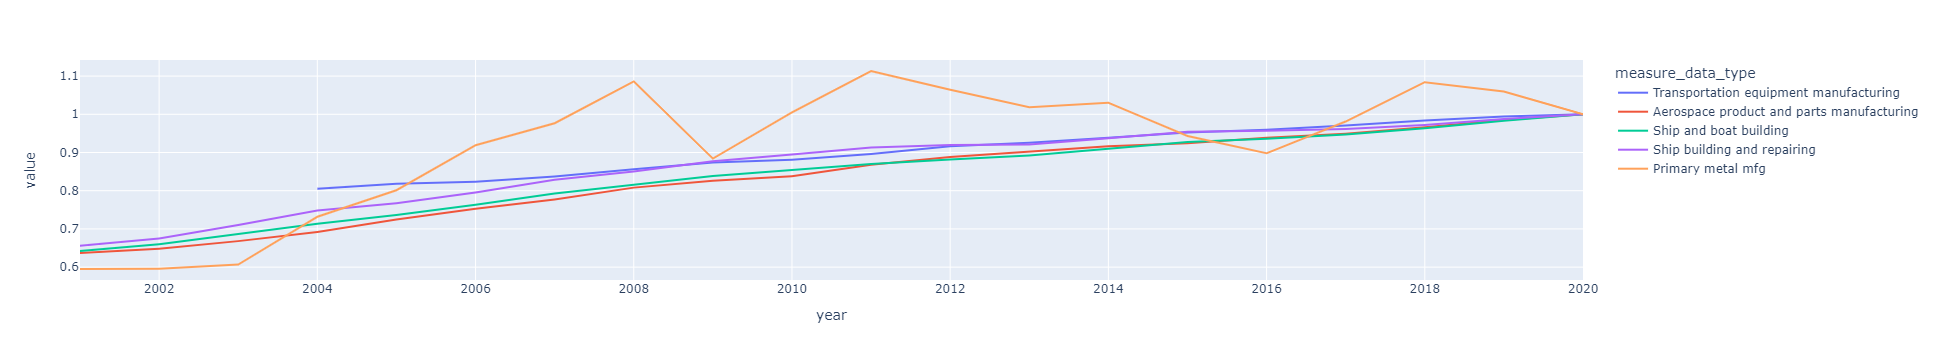

In [ ]:
fig = bls.assign(year=lambda x: x.year.map(int), value = lambda x: x.value.map(float)).plot(x='year', y ='value', color ='measure_data_type')
fig.show()

In [ ]:
surveys = bls_surveys()
surveys.loc[surveys.survey_name.str.contains("Consumer")]

,survey_abbreviation,survey_name
0,AP,Consumer Price Index - Average Price Data
12,CU,Consumer Price Index - All Urban Consumers
13,CW,Consumer Price Index - Urban Wage Earners and ...
14,CX,Consumer Expenditure Survey
38,LI,Consumer Price Index - Department Store Invent...
43,MU,Consumer Price Index - All Urban Consumers (Ol...
44,MW,Consumer Price Index - Urban Wage Earners and ...
60,SU,Consumer Price Index - Chained Consumer Price ...


In [ ]:
surveys.query("survey_abbreviation in ('PC','WP', 'AP')")

,survey_abbreviation,survey_name
0,AP,Consumer Price Index - Average Price Data
51,PC,Producer Price Index Industry Data
64,WP,Producer Price Index-Commodities
